In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rcParams.update({'font.size': 14})
from scipy.stats import linregress
from scipy.stats import pearsonr, spearmanr
from scipy.stats import ranksums
from scipy.stats import ttest_ind
from scipy.spatial import distance
from glob import glob
from sklearn.metrics import mean_squared_error

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)

In [3]:
#load info
Patient_Info = pd.read_csv('/Users/dawonchoi/Documents/HKUST/Y3/Summer/UROP 2200/Initial Recurrence/initial_info.csv', index_col=0)

In [4]:
#load initial file
Initial_relative = pd.read_table('/Users/dawonchoi/Documents/HKUST/Y3/Summer/UROP 2200/Initial Recurrence/initial_relative.txt', index_col=0)
Initial_relative.index = Initial_relative.index.map(lambda x: str(x)[:-2])

In [5]:
#load recurrence file
Recurrence_relative = pd.read_table('/Users/dawonchoi/Documents/HKUST/Y3/Summer/UROP 2200/Initial Recurrence/recurrence_relative.txt', index_col=0)
Recurrence_relative.index = Recurrence_relative.index.map(lambda x: str(x)[:-2])

In [6]:
#add patient info for the ones with initial data
common = Initial_relative.index.intersection(Patient_Info.index)
common2 = Recurrence_relative.index.intersection(Patient_Info.index)
final_common = Recurrence_relative.index.intersection(Initial_relative.index)
final_common

Index(['PS001', 'PS002', 'PS003', 'PS004', 'PS005', 'PS006', 'PS007', 'PS008',
       'PS009', 'PS010',
       ...
       'PSX20', 'PSX18', 'PSX01', 'PSX14', 'PSX07', 'PSX09', 'PSX08', 'PSX02',
       'PSX05', 'PSX13'],
      dtype='object', name='Mixture', length=181)

In [7]:
combined_data = Patient_Info
combined_data = combined_data[combined_data.index.isin(final_common)]
Grade1 = combined_data.loc[:, combined_data.columns == "Grade_1"]
Grade2 = combined_data.loc[:, combined_data.columns == "Grade_2"]
grade_data = Grade1.join(Grade2)
grade_data

Grade_1 Grade_2
Patient_ID                
PS001           IV      IV
PS002           IV      IV
PS003           IV      IV
PS004           IV      IV
PS005           IV      IV
PS006           IV      IV
PS007           IV      IV
PS008           IV      IV
PS009           IV      IV
PS010           IV      IV
PS012           IV      IV
PS019           IV      IV
PS020           IV      IV
PS021           IV      IV
PS022           IV      IV
PS023           IV      IV
PS024           IV      IV
PS025           IV      IV
PS026           IV      IV
PS027           IV      IV
PS029           IV      IV
PS030           IV      IV
PS033           IV      IV
PS034           IV      IV
PS035           IV      IV
PS038           IV      IV
PS042           IV      IV
PS056           IV      IV
PS060           IV      IV
PS061           IV      IV
PS063           IV      IV
PS064           IV      IV
PS065           IV      IV
PS066           IV      IV
PS067           IV      IV
PS068           IV      IV
PS070           IV      IV
PS071           IV      IV
PS072           IV      IV
PS074           IV      IV
PS076           IV      IV
PS078           IV      IV
PS080           IV      IV
PS081           IV      IV
PS082           IV      IV
PS083           IV      IV
PS084           IV      IV
PS085           IV      IV
PS087           IV      IV
PS088           IV      IV
PS089           IV      IV
PS090           IV      IV
PS092           IV      IV
PS093           IV      IV
PS095           IV      IV
PS099           IV      IV
PS100           IV      IV
PS101           IV      IV
PS102           IV      IV
PS103           IV      IV
PS104           IV      IV
PS106           IV      IV
PS107           IV      IV
PS108           IV      IV
PS109           IV      IV
PS110           IV      IV
PS111           IV      IV
PS112           IV      IV
PS113           IV      IV
PS114           IV      IV
PS117           IV      IV
PS118           II      IV
PS122           IV      IV
PS123           IV      IV
PS124          III      IV
PS125           IV      IV
PS126           II      IV
PS127           II      IV
PS130           IV      IV
PS132           II      IV
PS133           II     III
PS135           IV      IV
PS136           II      IV
PS137           IV      IV
PS138           IV      IV
PS139           II      IV
PS140           IV      IV
PS141           II      IV
PS142           II     III
PS143          III      IV
PS144           II      IV
PS146          III      IV
PS147           II      IV
PS148           II      IV
PS149          III      IV
PS150           II      IV
PS151           II      IV
PS152           II     III
PS153          III      IV
PS155          III      IV
PS156           II      IV
PS157           IV      IV
PS158          III     III
PS159           II      II
PS160           IV      IV
PS161           IV      IV
PS162           IV      IV
PS163           IV      IV
PS164           IV      IV
PS165           IV      IV
PS166          III      IV
PS167           II     III
PS168           IV      IV
PS169           II     III
PS170           IV      IV
PS171           IV      IV
PS172          III     III
PS173          III      IV
PS174           IV      IV
PS175           IV      IV
PS176           IV      IV
PS177           IV      IV
PS178           II      IV
PS179           IV      IV
PS180          III     III
PS181           IV      IV
PS182           II      IV
PS184           II      IV
PS185           II     III
PS186           II      IV
PS187           IV      IV
PS188           II      IV
PS189           IV      IV
PS190           IV      IV
PS252          III     III
PS253           II     III
PS255          III      IV
PS256          III      II
PS257           II      IV
PS258          III     III
PS259          III      IV
PS260           II      IV
PS261           II     III
PS262           II     III
PS263           II      II
PS264           II      II
PS265          

In [8]:
#selecting for recurrence
select = grade_data[(grade_data['Grade_1']=="IV")&(grade_data['Grade_2']=="IV")]
grade_data.loc[select.index, 'Progression'] = "Recurrence"
grade_data

Grade_1 Grade_2 Progression
Patient_ID                            
PS001           IV      IV  Recurrence
PS002           IV      IV  Recurrence
PS003           IV      IV  Recurrence
PS004           IV      IV  Recurrence
PS005           IV      IV  Recurrence
PS006           IV      IV  Recurrence
PS007           IV      IV  Recurrence
PS008           IV      IV  Recurrence
PS009           IV      IV  Recurrence
PS010           IV      IV  Recurrence
PS012           IV      IV  Recurrence
PS019           IV      IV  Recurrence
PS020           IV      IV  Recurrence
PS021           IV      IV  Recurrence
PS022           IV      IV  Recurrence
PS023           IV      IV  Recurrence
PS024           IV      IV  Recurrence
PS025           IV      IV  Recurrence
PS026           IV      IV  Recurrence
PS027           IV      IV  Recurrence
PS029           IV      IV  Recurrence
PS030           IV      IV  Recurrence
PS033           IV      IV  Recurrence
PS034           IV      IV  Recurrence
PS035           IV      IV  Recurrence
PS038           IV      IV  Recurrence
PS042           IV      IV  Recurrence
PS056           IV      IV  Recurrence
PS060           IV      IV  Recurrence
PS061           IV      IV  Recurrence
PS063           IV      IV  Recurrence
PS064           IV      IV  Recurrence
PS065           IV      IV  Recurrence
PS066           IV      IV  Recurrence
PS067           IV      IV  Recurrence
PS068           IV      IV  Recurrence
PS070           IV      IV  Recurrence
PS071           IV      IV  Recurrence
PS072           IV      IV  Recurrence
PS074           IV      IV  Recurrence
PS076           IV      IV  Recurrence
PS078           IV      IV  Recurrence
PS080           IV      IV  Recurrence
PS081           IV      IV  Recurrence
PS082           IV      IV  Recurrence
PS083           IV      IV  Recurrence
PS084           IV      IV  Recurrence
PS085           IV      IV  Recurrence
PS087           IV      IV  Recurrence
PS088           IV      IV  Recurrence
PS089           IV      IV  Recurrence
PS090           IV      IV  Recurrence
PS092           IV      IV  Recurrence
PS093           IV      IV  Recurrence
PS095           IV      IV  Recurrence
PS099           IV      IV  Recurrence
PS100           IV      IV  Recurrence
PS101           IV      IV  Recurrence
PS102           IV      IV  Recurrence
PS103           IV      IV  Recurrence
PS104           IV      IV  Recurrence
PS106           IV      IV  Recurrence
PS107           IV      IV  Recurrence
PS108           IV      IV  Recurrence
PS109           IV      IV  Recurrence
PS110           IV      IV  Recurrence
PS111           IV      IV  Recurrence
PS112           IV      IV  Recurrence
PS113           IV      IV  Recurrence
PS114           IV      IV  Recurrence
PS117           IV      IV  Recurrence
PS118           II      IV         NaN
PS122           IV      IV  Recurrence
PS123           IV      IV  Recurrence
PS124          III      IV         NaN
PS125           IV      IV  Recurrence
PS126           II      IV         NaN
PS127           II      IV         NaN
PS130           IV      IV  Recurrence
PS132           II      IV         NaN
PS133           II     III         NaN
PS135           IV      IV  Recurrence
PS136           II      IV         NaN
PS137           IV      IV  Recurrence
PS138           IV      IV  Recurrence
PS139           II      IV         NaN
PS140           IV      IV  Recurrence
PS141           II      IV         NaN
PS142           II     III         NaN
PS143          III      IV         NaN
PS144           II      IV         NaN
PS146          III      IV         NaN
PS147           II      IV         NaN
PS148           II      IV         NaN
PS149          III      IV         NaN
PS150           II      IV         NaN
PS151           II      IV         NaN
PS152           II     III         NaN
PS153          III      IV         NaN
PS155          III      IV         NaN
PS156           II      IV       

In [9]:
#selecting for no progression
select2 = grade_data[(grade_data['Grade_2']=="II")]
select3 = grade_data[(grade_data['Grade_2']=="III")]
grade_data.loc[select2.index, 'Progression'] = "No Progression"
grade_data.loc[select3.index, 'Progression'] = "No Progression"
grade_data

Grade_1 Grade_2     Progression
Patient_ID                                
PS001           IV      IV      Recurrence
PS002           IV      IV      Recurrence
PS003           IV      IV      Recurrence
PS004           IV      IV      Recurrence
PS005           IV      IV      Recurrence
PS006           IV      IV      Recurrence
PS007           IV      IV      Recurrence
PS008           IV      IV      Recurrence
PS009           IV      IV      Recurrence
PS010           IV      IV      Recurrence
PS012           IV      IV      Recurrence
PS019           IV      IV      Recurrence
PS020           IV      IV      Recurrence
PS021           IV      IV      Recurrence
PS022           IV      IV      Recurrence
PS023           IV      IV      Recurrence
PS024           IV      IV      Recurrence
PS025           IV      IV      Recurrence
PS026           IV      IV      Recurrence
PS027           IV      IV      Recurrence
PS029           IV      IV      Recurrence
PS030           IV      IV      Recurrence
PS033           IV      IV      Recurrence
PS034           IV      IV      Recurrence
PS035           IV      IV      Recurrence
PS038           IV      IV      Recurrence
PS042           IV      IV      Recurrence
PS056           IV      IV      Recurrence
PS060           IV      IV      Recurrence
PS061           IV      IV      Recurrence
PS063           IV      IV      Recurrence
PS064           IV      IV      Recurrence
PS065           IV      IV      Recurrence
PS066           IV      IV      Recurrence
PS067           IV      IV      Recurrence
PS068           IV      IV      Recurrence
PS070           IV      IV      Recurrence
PS071           IV      IV      Recurrence
PS072           IV      IV      Recurrence
PS074           IV      IV      Recurrence
PS076           IV      IV      Recurrence
PS078           IV      IV      Recurrence
PS080           IV      IV      Recurrence
PS081           IV      IV      Recurrence
PS082           IV      IV      Recurrence
PS083           IV      IV      Recurrence
PS084           IV      IV      Recurrence
PS085           IV      IV      Recurrence
PS087           IV      IV      Recurrence
PS088           IV      IV      Recurrence
PS089           IV      IV      Recurrence
PS090           IV      IV      Recurrence
PS092           IV      IV      Recurrence
PS093           IV      IV      Recurrence
PS095           IV      IV      Recurrence
PS099           IV      IV      Recurrence
PS100           IV      IV      Recurrence
PS101           IV      IV      Recurrence
PS102           IV      IV      Recurrence
PS103           IV      IV      Recurrence
PS104           IV      IV      Recurrence
PS106           IV      IV      Recurrence
PS107           IV      IV      Recurrence
PS108           IV      IV      Recurrence
PS109           IV      IV      Recurrence
PS110           IV      IV      Recurrence
PS111           IV      IV      Recurrence
PS112           IV      IV      Recurrence
PS113           IV      IV      Recurrence
PS114           IV      IV      Recurrence
PS117           IV      IV      Recurrence
PS118           II      IV             NaN
PS122           IV      IV      Recurrence
PS123           IV      IV      Recurrence
PS124          III      IV             NaN
PS125           IV      IV      Recurrence
PS126           II      IV             NaN
PS127           II      IV             NaN
PS130           IV      IV      Recurrence
PS132           II      IV             NaN
PS133           II     III  No Progression
PS135           IV      IV      Recurrence
PS136           II      IV             NaN
PS137           IV      IV      Recurrence
PS138           IV      IV      Recurrence
PS139           II      IV             NaN
PS140           IV      IV      Recurrence
PS141           II      IV             NaN
PS142           II     III  No Progression
PS143          III      IV             NaN
PS144           II      IV             NaN
PS146       

In [10]:
grade_data = grade_data.fillna("Progression")
grade_data

Grade_1 Grade_2     Progression
Patient_ID                                
PS001           IV      IV      Recurrence
PS002           IV      IV      Recurrence
PS003           IV      IV      Recurrence
PS004           IV      IV      Recurrence
PS005           IV      IV      Recurrence
PS006           IV      IV      Recurrence
PS007           IV      IV      Recurrence
PS008           IV      IV      Recurrence
PS009           IV      IV      Recurrence
PS010           IV      IV      Recurrence
PS012           IV      IV      Recurrence
PS019           IV      IV      Recurrence
PS020           IV      IV      Recurrence
PS021           IV      IV      Recurrence
PS022           IV      IV      Recurrence
PS023           IV      IV      Recurrence
PS024           IV      IV      Recurrence
PS025           IV      IV      Recurrence
PS026           IV      IV      Recurrence
PS027           IV      IV      Recurrence
PS029           IV      IV      Recurrence
PS030           IV      IV      Recurrence
PS033           IV      IV      Recurrence
PS034           IV      IV      Recurrence
PS035           IV      IV      Recurrence
PS038           IV      IV      Recurrence
PS042           IV      IV      Recurrence
PS056           IV      IV      Recurrence
PS060           IV      IV      Recurrence
PS061           IV      IV      Recurrence
PS063           IV      IV      Recurrence
PS064           IV      IV      Recurrence
PS065           IV      IV      Recurrence
PS066           IV      IV      Recurrence
PS067           IV      IV      Recurrence
PS068           IV      IV      Recurrence
PS070           IV      IV      Recurrence
PS071           IV      IV      Recurrence
PS072           IV      IV      Recurrence
PS074           IV      IV      Recurrence
PS076           IV      IV      Recurrence
PS078           IV      IV      Recurrence
PS080           IV      IV      Recurrence
PS081           IV      IV      Recurrence
PS082           IV      IV      Recurrence
PS083           IV      IV      Recurrence
PS084           IV      IV      Recurrence
PS085           IV      IV      Recurrence
PS087           IV      IV      Recurrence
PS088           IV      IV      Recurrence
PS089           IV      IV      Recurrence
PS090           IV      IV      Recurrence
PS092           IV      IV      Recurrence
PS093           IV      IV      Recurrence
PS095           IV      IV      Recurrence
PS099           IV      IV      Recurrence
PS100           IV      IV      Recurrence
PS101           IV      IV      Recurrence
PS102           IV      IV      Recurrence
PS103           IV      IV      Recurrence
PS104           IV      IV      Recurrence
PS106           IV      IV      Recurrence
PS107           IV      IV      Recurrence
PS108           IV      IV      Recurrence
PS109           IV      IV      Recurrence
PS110           IV      IV      Recurrence
PS111           IV      IV      Recurrence
PS112           IV      IV      Recurrence
PS113           IV      IV      Recurrence
PS114           IV      IV      Recurrence
PS117           IV      IV      Recurrence
PS118           II      IV     Progression
PS122           IV      IV      Recurrence
PS123           IV      IV      Recurrence
PS124          III      IV     Progression
PS125           IV      IV      Recurrence
PS126           II      IV     Progression
PS127           II      IV     Progression
PS130           IV      IV      Recurrence
PS132           II      IV     Progression
PS133           II     III  No Progression
PS135           IV      IV      Recurrence
PS136           II      IV     Progression
PS137           IV      IV      Recurrence
PS138           IV      IV      Recurrence
PS139           II      IV     Progression
PS140           IV      IV      Recurrence
PS141           II      IV     Progression
PS142           II     III  No Progression
PS143          III      IV     Progression
PS144           II      IV     Progression
PS146       

In [11]:
initial_final = pd.concat([grade_data, Initial_relative], axis=1)
initial_final = initial_final[initial_final.index.isin(final_common)]
initial_final.index.name = 'Mixture'
initial_final = initial_final.drop(['Grade_1', 'Grade_2', 'P-value','Correlation','RMSE'], axis=1)
initial_final = initial_final.sort_values(by='Mixture')
initial_final['Type'] = 'Initial'
initial_final

Progression   Naive B  Memory B  CD8+ naive T  KLRG1-low CD8+ Tcm  \
Mixture                                                                         
PS001        Recurrence  0.015223  0.016476      0.025262            0.000000   
PS002        Recurrence  0.026615  0.008370      0.042649            0.000000   
PS003        Recurrence  0.026402  0.023463      0.048903            0.009001   
PS004        Recurrence  0.012746  0.024343      0.032605            0.046031   
PS005        Recurrence  0.020502  0.022985      0.043766            0.000000   
PS006        Recurrence  0.021856  0.026483      0.046271            0.044168   
PS007        Recurrence  0.023187  0.020232      0.044268            0.000000   
PS008        Recurrence  0.037530  0.022950      0.071441            0.000000   
PS009        Recurrence  0.019884  0.039373      0.071027            0.006194   
PS010        Recurrence  0.037247  0.022175      0.055063            0.000000   
PS012        Recurrence  0.028530  0.020385      0.067879            0.039587   
PS019        Recurrence  0.025057  0.012090      0.048198            0.000000   
PS020        Recurrence  0.012768  0.021876      0.037062            0.005807   
PS021        Recurrence  0.016553  0.022950      0.039311            0.007083   
PS022        Recurrence  0.016815  0.016103      0.022799            0.034108   
PS023        Recurrence  0.022190  0.018997      0.053882            0.030653   
PS024        Recurrence  0.014464  0.024374      0.028154            0.009376   
PS025        Recurrence  0.006497  0.019130      0.029134            0.026075   
PS026        Recurrence  0.012752  0.025196      0.041293            0.020321   
PS027        Recurrence  0.009274  0.042195      0.074094            0.007641   
PS029        Recurrence  0.018469  0.017226      0.029188            0.000000   
PS030        Recurrence  0.015921  0.025201      0.046324            0.031110   
PS033        Recurrence  0.014644  0.014767      0.029985            0.014740   
PS034        Recurrence  0.017279  0.016843      0.023671            0.011738   
PS035        Recurrence  0.028534  0.014988      0.054946            0.023060   
PS038        Recurrence  0.013277  0.015126      0.033605            0.006942   
PS042        Recurrence  0.009412  0.016656      0.020210            0.016002   
PS056        Recurrence  0.027076  0.009827      0.039619            0.000000   
PS060        Recurrence  0.018784  0.013568      0.042968            0.000000   
PS061        Recurrence  0.023556  0.010399      0.044532            0.000000   
PS063        Recurrence  0.013800  0.022275      0.025719            0.000000   
PS064        Recurrence  0.021346  0.016678      0.043596            0.000000   
PS065        Recurrence  0.022793  0.020476      0.030349            0.000000   
PS066        Recurrence  0.020680  0.022929      0.040663            0.000000   
PS067        Recurrence  0.017651  0.013387      0.037801            0.000000   
PS068        Recurrence  0.026143  0.011546      0.060845            0.000000   
PS070        Recurrence  0.023289  0.020534      0.046532            0.000000   
PS071        Recurrence  0.039721  0.003262      0.073405            0.000000   
PS072        Recurrence  0.023314  0.023479      0.051966            0.011622   
PS074        Recurrence  0.017601  0.020606      0.052593            0.000000   
PS076        Recurrence  0.039041  0.020138      0.082395            0.006940   
PS078        Recurrence  0.022523  0.014726      0.042940            0.010250   
PS080        Recurrence  0.022059  0.026846      0.049434            0.007808   
PS081        Recurrence  0.026093  0.017011      0.061901            0.000000   
PS082        Recurrence  0.014732  0.014833      0.036332            0.000000   
PS083        Recurrence  0.017143  0.018221      0.038892            0.000000   
PS084        Recurrence  0.027706  0.030462      0.061863            0.046846   
PS085        Recurrence  0.011918  0.017771

In [12]:
recurrence_final = pd.concat([grade_data, Recurrence_relative], axis=1)
recurrence_final = recurrence_final[recurrence_final.index.isin(final_common)]
recurrence_final.index.name = 'Mixture'
recurrence_final = recurrence_final.drop(['Grade_1', 'Grade_2', 'P-value','Correlation','RMSE'], axis=1)
recurrence_final = recurrence_final.sort_values(by='Mixture')
recurrence_final['Type'] = 'Recurrence'
recurrence_final

Progression   Naive B  Memory B  CD8+ naive T  KLRG1-low CD8+ Tcm  \
Mixture                                                                         
PS001        Recurrence  0.010646  0.034658      0.043764            0.043499   
PS002        Recurrence  0.005990  0.036620      0.038919            0.035520   
PS003        Recurrence  0.002118  0.042886      0.038200            0.036106   
PS004        Recurrence  0.009139  0.022280      0.025013            0.007553   
PS005        Recurrence  0.016154  0.035486      0.067070            0.002766   
PS006        Recurrence  0.017559  0.023245      0.042248            0.033664   
PS007        Recurrence  0.009475  0.025170      0.019052            0.001612   
PS008        Recurrence  0.023126  0.042127      0.097055            0.012965   
PS009        Recurrence  0.020228  0.035143      0.070711            0.058937   
PS010        Recurrence  0.008824  0.048921      0.069352            0.029686   
PS012        Recurrence  0.029245  0.047166      0.083545            0.099369   
PS019        Recurrence  0.017949  0.021645      0.031157            0.043967   
PS020        Recurrence  0.015983  0.022748      0.038624            0.053361   
PS021        Recurrence  0.010327  0.015418      0.027242            0.033590   
PS022        Recurrence  0.014433  0.027579      0.040121            0.048546   
PS023        Recurrence  0.015608  0.030988      0.040678            0.046200   
PS024        Recurrence  0.012855  0.017199      0.032427            0.033903   
PS025        Recurrence  0.001258  0.020859      0.031457            0.017954   
PS026        Recurrence  0.010013  0.023799      0.026040            0.039400   
PS027        Recurrence  0.018558  0.032658      0.054314            0.053586   
PS029        Recurrence  0.012716  0.028707      0.054511            0.027628   
PS030        Recurrence  0.016852  0.024300      0.033988            0.025716   
PS033        Recurrence  0.013457  0.010852      0.029792            0.017659   
PS034        Recurrence  0.014229  0.015534      0.018270            0.017740   
PS035        Recurrence  0.018088  0.015181      0.027289            0.018438   
PS038        Recurrence  0.020191  0.024372      0.045371            0.026172   
PS042        Recurrence  0.010456  0.018338      0.034488            0.019501   
PS056        Recurrence  0.020466  0.029819      0.057166            0.017442   
PS060        Recurrence  0.006057  0.034410      0.051164            0.000000   
PS061        Recurrence  0.008716  0.031391      0.054671            0.008188   
PS063        Recurrence  0.011074  0.022658      0.026650            0.008626   
PS064        Recurrence  0.015603  0.021129      0.060430            0.034812   
PS065        Recurrence  0.011833  0.034724      0.051741            0.051681   
PS066        Recurrence  0.008604  0.035384      0.045343            0.009006   
PS067        Recurrence  0.001742  0.026742      0.031475            0.000485   
PS068        Recurrence  0.006114  0.038956      0.054633            0.000000   
PS070        Recurrence  0.025826  0.029720      0.057685            0.020444   
PS071        Recurrence  0.021918  0.029521      0.070057            0.000000   
PS072        Recurrence  0.007311  0.036752      0.041171            0.033010   
PS074        Recurrence  0.010529  0.026511      0.029561            0.028530   
PS076        Recurrence  0.039269  0.012475      0.121473            0.067304   
PS078        Recurrence  0.013568  0.034221      0.039395            0.020144   
PS080        Recurrence  0.018649  0.032148      0.052571            0.018628   
PS081        Recurrence  0.019293  0.040814      0.058091            0.044921   
PS082        Recurrence  0.005841  0.031049      0.041884            0.000000   
PS083        Recurrence  0.007597  0.037614      0.056777            0.000000   
PS084        Recurrence  0.016665  0.042246      0.048837            0.033760   
PS085        Recurrence  0.015749  0.020784

In [13]:
finalfinal = pd.concat([initial_final, recurrence_final]) 
finalfinal

Progression   Naive B  Memory B  CD8+ naive T  KLRG1-low CD8+ Tcm  \
Mixture                                                                         
PS001        Recurrence  0.015223  0.016476      0.025262            0.000000   
PS002        Recurrence  0.026615  0.008370      0.042649            0.000000   
PS003        Recurrence  0.026402  0.023463      0.048903            0.009001   
PS004        Recurrence  0.012746  0.024343      0.032605            0.046031   
PS005        Recurrence  0.020502  0.022985      0.043766            0.000000   
PS006        Recurrence  0.021856  0.026483      0.046271            0.044168   
PS007        Recurrence  0.023187  0.020232      0.044268            0.000000   
PS008        Recurrence  0.037530  0.022950      0.071441            0.000000   
PS009        Recurrence  0.019884  0.039373      0.071027            0.006194   
PS010        Recurrence  0.037247  0.022175      0.055063            0.000000   
PS012        Recurrence  0.028530  0.020385      0.067879            0.039587   
PS019        Recurrence  0.025057  0.012090      0.048198            0.000000   
PS020        Recurrence  0.012768  0.021876      0.037062            0.005807   
PS021        Recurrence  0.016553  0.022950      0.039311            0.007083   
PS022        Recurrence  0.016815  0.016103      0.022799            0.034108   
PS023        Recurrence  0.022190  0.018997      0.053882            0.030653   
PS024        Recurrence  0.014464  0.024374      0.028154            0.009376   
PS025        Recurrence  0.006497  0.019130      0.029134            0.026075   
PS026        Recurrence  0.012752  0.025196      0.041293            0.020321   
PS027        Recurrence  0.009274  0.042195      0.074094            0.007641   
PS029        Recurrence  0.018469  0.017226      0.029188            0.000000   
PS030        Recurrence  0.015921  0.025201      0.046324            0.031110   
PS033        Recurrence  0.014644  0.014767      0.029985            0.014740   
PS034        Recurrence  0.017279  0.016843      0.023671            0.011738   
PS035        Recurrence  0.028534  0.014988      0.054946            0.023060   
PS038        Recurrence  0.013277  0.015126      0.033605            0.006942   
PS042        Recurrence  0.009412  0.016656      0.020210            0.016002   
PS056        Recurrence  0.027076  0.009827      0.039619            0.000000   
PS060        Recurrence  0.018784  0.013568      0.042968            0.000000   
PS061        Recurrence  0.023556  0.010399      0.044532            0.000000   
PS063        Recurrence  0.013800  0.022275      0.025719            0.000000   
PS064        Recurrence  0.021346  0.016678      0.043596            0.000000   
PS065        Recurrence  0.022793  0.020476      0.030349            0.000000   
PS066        Recurrence  0.020680  0.022929      0.040663            0.000000   
PS067        Recurrence  0.017651  0.013387      0.037801            0.000000   
PS068        Recurrence  0.026143  0.011546      0.060845            0.000000   
PS070        Recurrence  0.023289  0.020534      0.046532            0.000000   
PS071        Recurrence  0.039721  0.003262      0.073405            0.000000   
PS072        Recurrence  0.023314  0.023479      0.051966            0.011622   
PS074        Recurrence  0.017601  0.020606      0.052593            0.000000   
PS076        Recurrence  0.039041  0.020138      0.082395            0.006940   
PS078        Recurrence  0.022523  0.014726      0.042940            0.010250   
PS080        Recurrence  0.022059  0.026846      0.049434            0.007808   
PS081        Recurrence  0.026093  0.017011      0.061901            0.000000   
PS082        Recurrence  0.014732  0.014833      0.036332            0.000000   
PS083        Recurrence  0.017143  0.018221      0.038892            0.000000   
PS084        Recurrence  0.027706  0.030462      0.061863            0.046846   
PS085        Recurrence  0.011918  0.017771

In [14]:
final_mdf = pd.melt(finalfinal.reset_index(), id_vars=('Mixture', 'Type','Progression'))
final_mdf

Mixture        Type     Progression             variable     value
0      PS001     Initial      Recurrence              Naive B  0.015223
1      PS002     Initial      Recurrence              Naive B  0.026615
2      PS003     Initial      Recurrence              Naive B  0.026402
3      PS004     Initial      Recurrence              Naive B  0.012746
4      PS005     Initial      Recurrence              Naive B  0.020502
5      PS006     Initial      Recurrence              Naive B  0.021856
6      PS007     Initial      Recurrence              Naive B  0.023187
7      PS008     Initial      Recurrence              Naive B  0.037530
8      PS009     Initial      Recurrence              Naive B  0.019884
9      PS010     Initial      Recurrence              Naive B  0.037247
10     PS012     Initial      Recurrence              Naive B  0.028530
11     PS019     Initial      Recurrence              Naive B  0.025057
12     PS020     Initial      Recurrence              Naive B  0.012768
13     PS021     Initial      Recurrence              Naive B  0.016553
14     PS022     Initial      Recurrence              Naive B  0.016815
15     PS023     Initial      Recurrence              Naive B  0.022190
16     PS024     Initial      Recurrence              Naive B  0.014464
17     PS025     Initial      Recurrence              Naive B  0.006497
18     PS026     Initial      Recurrence              Naive B  0.012752
19     PS027     Initial      Recurrence              Naive B  0.009274
20     PS029     Initial      Recurrence              Naive B  0.018469
21     PS030     Initial      Recurrence              Naive B  0.015921
22     PS033     Initial      Recurrence              Naive B  0.014644
23     PS034     Initial      Recurrence              Naive B  0.017279
24     PS035     Initial      Recurrence              Naive B  0.028534
25     PS038     Initial      Recurrence              Naive B  0.013277
26     PS042     Initial      Recurrence              Naive B  0.009412
27     PS056     Initial      Recurrence              Naive B  0.027076
28     PS060     Initial      Recurrence              Naive B  0.018784
29     PS061     Initial      Recurrence              Naive B  0.023556
30     PS063     Initial      Recurrence              Naive B  0.013800
31     PS064     Initial      Recurrence              Naive B  0.021346
32     PS065     Initial      Recurrence              Naive B  0.022793
33     PS066     Initial      Recurrence              Naive B  0.020680
34     PS067     Initial      Recurrence              Naive B  0.017651
35     PS068     Initial      Recurrence              Naive B  0.026143
36     PS070     Initial      Recurrence              Naive B  0.023289
37     PS071     Initial      Recurrence              Naive B  0.039721
38     PS072     Initial      Recurrence              Naive B  0.023314
39     PS074     Initial      Recurrence              Naive B  0.017601
40     PS076     Initial      Recurrence              Naive B  0.039041
41     PS078     Initial      Recurrence              Naive B  0.022523
42     PS080     Initial      Recurrence              Naive B  0.022059
43     PS081     Initial      Recurrence              Naive B  0.026093
44     PS082     Initial      Recurrence              Naive B  0.014732
45     PS083     Initial      Recurrence              Naive B  0.017143
46     PS084     Initial      Recurrence              Naive B  0.027706
47     PS085     Initial      Recurrence              Naive B  0.011918
48     PS087     Initial      Recurrence              Naive B  0.018362
49     PS088     Initial      Recurrence              Naive B  0.012666
50     PS089     Initial      Recurrence              Naive B  0.020260
51     PS090     Initial      Recurrence              Naive B  0.015482
52     PS092     Initial      Recurrence              Naive B  0.013269
53     PS093     Initial      Recurrence              Naive B  0.020492
54     PS095     Initial      Recurrence     

Naive B
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Progression_Initial v.s. Progression_Recurrence: t-test independent samples with Bonferroni correction, P_val=5.273e-03 stat=3.265e+00
Recurrence_Initial v.s. Recurrence_Recurrence: t-test independent samples with Bonferroni correction, P_val=3.704e-11 stat=7.107e+00
No Progression_Initial v.s. No Progression_Recurrence: t-test independent samples with Bonferroni correction, P_val=4.514e-04 stat=4.167e+00
Memory B
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Progression_Initial v.s. Progression_Recurrence: t-test independent samples with Bonferroni correction, P_val=3.441e-05 stat=-4.760e+00
Recurrence_Initial v.s. Recurrence_Recurrence: t-test independent samples with Bonferroni correction, P_val=2.

<ipython-input-19-1221fcf640d6>:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(5,5.1))


Recurrence_Initial v.s. Recurrence_Recurrence: t-test independent samples with Bonferroni correction, P_val=7.108e-01 stat=-1.186e+00
No Progression_Initial v.s. No Progression_Recurrence: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=8.944e-01
DC
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Progression_Initial v.s. Progression_Recurrence: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=2.843e-01
Recurrence_Initial v.s. Recurrence_Recurrence: t-test independent samples with Bonferroni correction, P_val=9.861e-01 stat=-9.786e-01
No Progression_Initial v.s. No Progression_Recurrence: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=4.364e-01


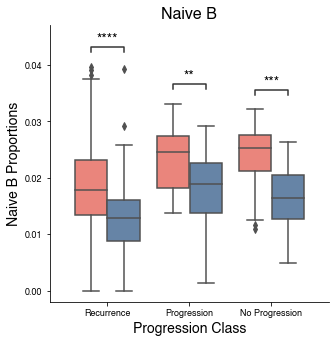

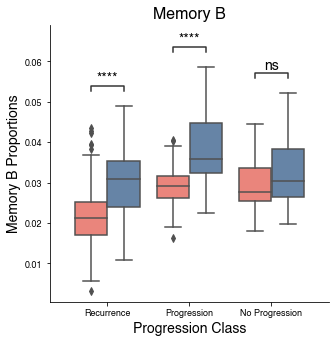

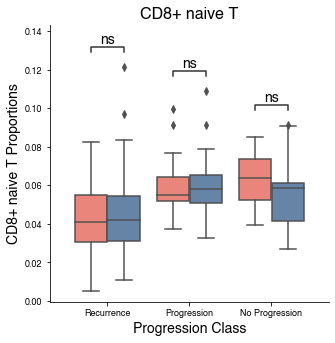

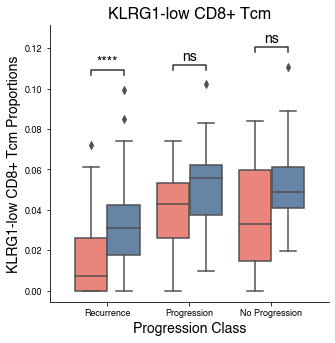

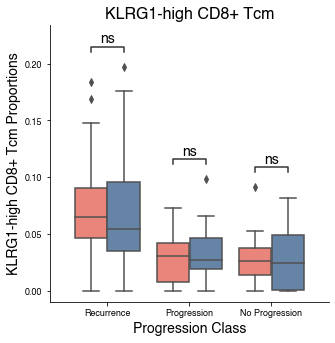

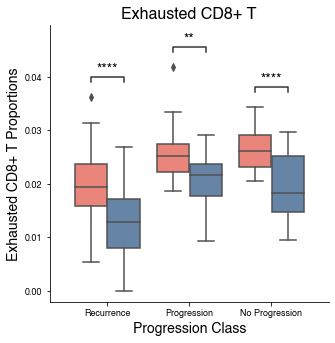

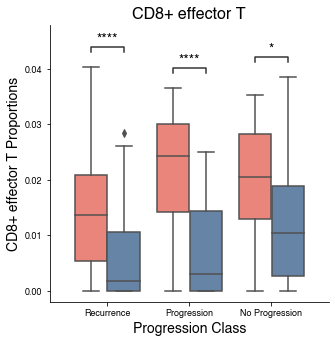

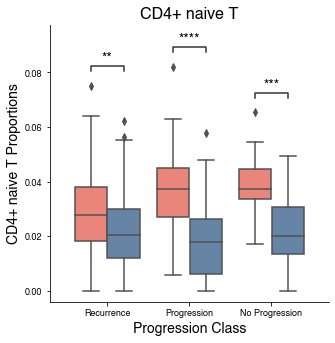

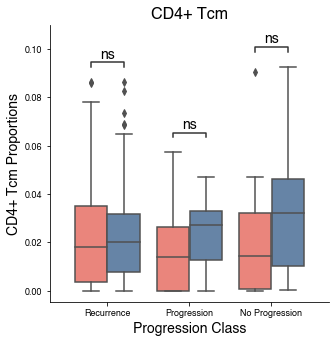

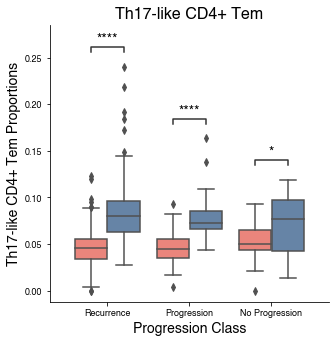

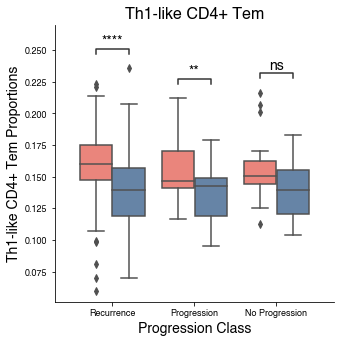

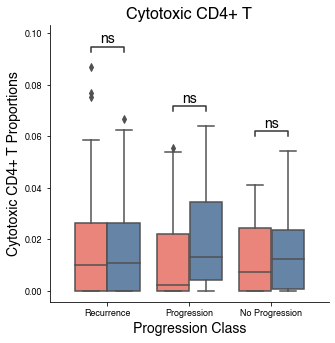

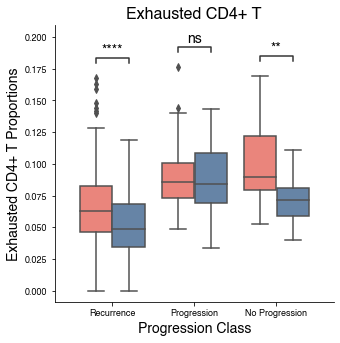

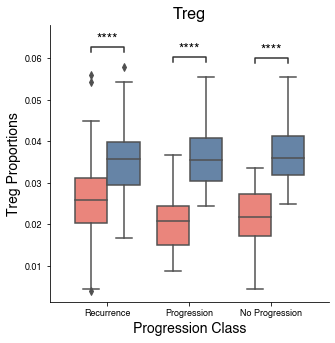

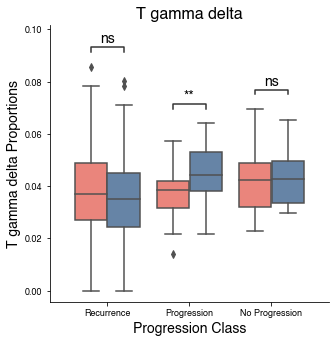

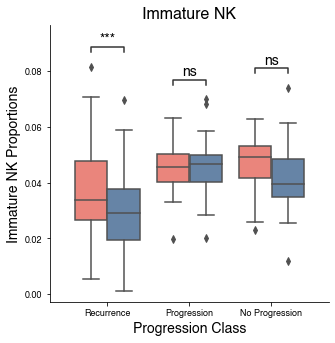

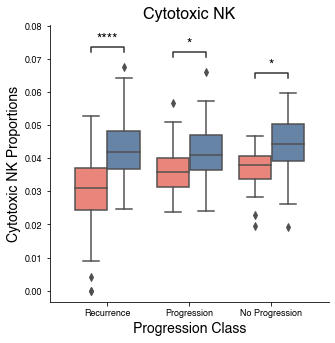

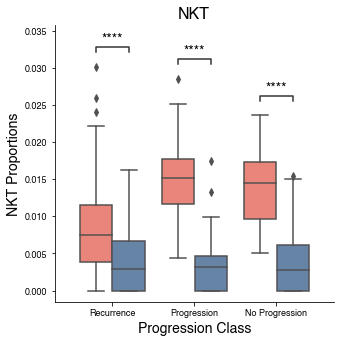

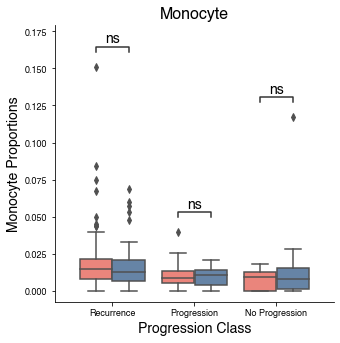

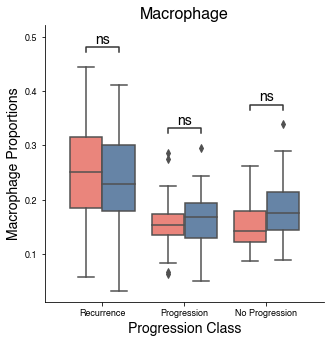

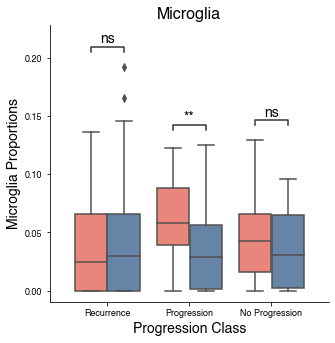

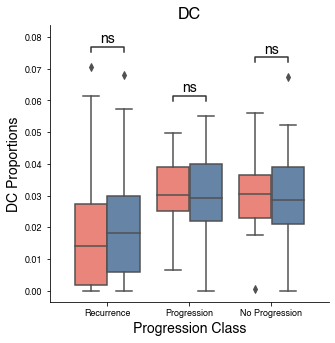

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
colors = ["#FC766AFF","#5B84B1FF"]
sns.set_palette(sns.color_palette(colors))
import statannot
box_pairs=[
    (("Recurrence", "Initial"), ("Recurrence", "Recurrence")),
    (("Progression", "Initial"), ("Progression", "Recurrence")),
    (("No Progression", "Initial"), ("No Progression", "Recurrence"))
    ]

cells = list(Initial_relative.T[0:22].index)
for c in cells:
    print(c)
    tmp = final_mdf.loc[final_mdf['variable'] == c]
    plt.figure(figsize=(5,5.1))
    #plt.rcParams['font.size'] = '8'
    plt.title(c, fontsize=16)
    plt.xticks(fontsize=9)
    plt.yticks(fontsize=9)
    ax = sns.boxplot(x='Progression', y='value',hue="Type", data=tmp)
    ax.set_xlabel("Progression Class", fontsize=14)
    ax.set_ylabel(c+" Proportions", fontsize=14)  
    plt.legend([],[], frameon=False)
#     ax.legend(loc='upper left',bbox_to_anchor=(1,1), fontsize=12,title='Type',title_fontsize=12,borderpad=.5, labelspacing=.5)
#     ax.legend(loc='upper left',bbox_to_anchor=(1,1), ncol=2, fontsize=12,borderpad=.5, labelspacing=.5)

    sns.despine()
   
    statannot.add_stat_annotation(
        ax,
        data=tmp,
        x='Progression',
        y='value',
        hue="Type",
        box_pairs=box_pairs,
        test="t-test_ind",
        text_format="star",
        loc="inside",
    )
    plt.savefig(c+'.png')

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Progression_Initial v.s. Progression_Recurrence: t-test independent samples with Bonferroni correction, P_val=1.331e-11 stat=-8.489e+00
Recurrence_Initial v.s. Recurrence_Recurrence: t-test independent samples with Bonferroni correction, P_val=5.302e-16 stat=-8.839e+00
No Progression_Initial v.s. No Progression_Recurrence: t-test independent samples with Bonferroni correction, P_val=9.976e-08 stat=-6.749e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Progression_Initial v.s. Progression_Recurrence: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=4.803e-02
Recurrence_Initial v.s. Recurrence_Recurrence: t-test independent samples with Bonferroni correction, P_val=1.125e-04 stat=4.

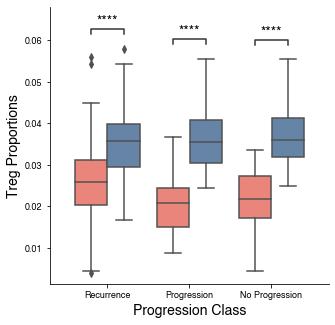

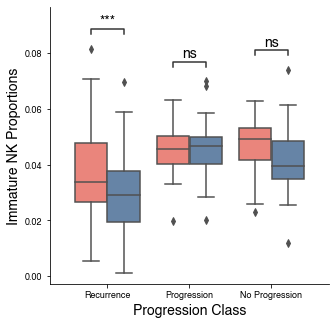

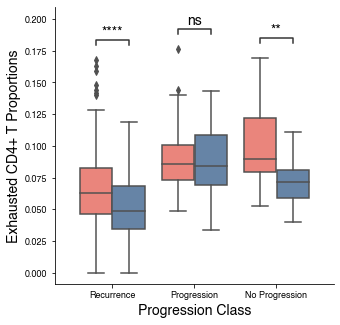

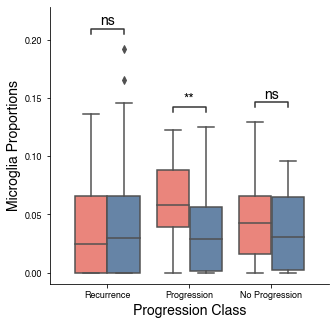

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
colors = ["#FC766AFF","#5B84B1FF"]
sns.set_palette(sns.color_palette(colors))
import statannot
box_pairs=[
    (("Recurrence", "Initial"), ("Recurrence", "Recurrence")),
    (("Progression", "Initial"), ("Progression", "Recurrence")),
    (("No Progression", "Initial"), ("No Progression", "Recurrence"))
    ]

cells = ["Treg", "Immature NK", "Exhausted CD4+ T", "Microglia"]
for c in cells:
    tmp = final_mdf.loc[final_mdf['variable'] == c]
    plt.figure(figsize=(5,5.1))
    #plt.rcParams['font.size'] = '8'
#     plt.title(c, fontsize=16)
    plt.xticks(fontsize=9)
    plt.yticks(fontsize=9)
    ax = sns.boxplot(x='Progression', y='value',hue="Type", data=tmp)
    ax.set_xlabel("Progression Class", fontsize=14)
    ax.set_ylabel(c+" Proportions", fontsize=14)  
    plt.legend([],[], frameon=False)
#     ax.legend(loc='upper left',bbox_to_anchor=(1,1), fontsize=12,title='Type',title_fontsize=12,borderpad=.5, labelspacing=.5)
#     ax.legend(loc='upper left',bbox_to_anchor=(1,1), ncol=2, fontsize=12,borderpad=.5, labelspacing=.5)

    sns.despine()
   
    statannot.add_stat_annotation(
        ax,
        data=tmp,
        x='Progression',
        y='value',
        hue="Type",
        box_pairs=box_pairs,
        test="t-test_ind",
        text_format="star",
        loc="inside",
    )


In [17]:
progression = ['Recurrence','Progression','No Progression']

for c in cells:
    specific_cell_type = final_mdf.loc[final_mdf['variable'] == c]
    for p in progression:
        specific_progression = specific_cell_type.loc[specific_cell_type['Progression'] == p]
        first = specific_progression.loc[specific_progression['Type'] == 'Initial']
        second = specific_progression.loc[specific_progression['Type'] == 'Recurrence']
        print(c,' - ', p)
        print('Between Initial and Recurrence: ')
        print(ranksums(first.iloc[:,4], second.iloc[:,4]))
        print ('--------------------------------')

Treg  -  Recurrence
Between Initial and Recurrence: 
RanksumsResult(statistic=-8.099572582119002, pvalue=5.515261358276546e-16)
--------------------------------
Treg  -  Progression
Between Initial and Recurrence: 
RanksumsResult(statistic=-5.995437734798085, pvalue=2.0293804329702694e-09)
--------------------------------
Treg  -  No Progression
Between Initial and Recurrence: 
RanksumsResult(statistic=-5.163977794943222, pvalue=2.417563881119019e-07)
--------------------------------
Immature NK  -  Recurrence
Between Initial and Recurrence: 
RanksumsResult(statistic=3.8060731595872905, pvalue=0.0001411906340041636)
--------------------------------
Immature NK  -  Progression
Between Initial and Recurrence: 
RanksumsResult(statistic=-0.07053456158585983, pvalue=0.9437681928745766)
--------------------------------
Immature NK  -  No Progression
Between Initial and Recurrence: 
RanksumsResult(statistic=1.5022480858016647, pvalue=0.13303305043998506)
--------------------------------
Exhau